# Análisis descriptivo EDA
Para su trabajo incluir:
Media, 
Mediana, 
Moda, 
Desviación Estándar
Coeficiente de Variación
Quantiles (Al menos Cuartiles)
Análisis de Frecuencias
Gráficas 


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Highest Holywood Grossing Movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  1000 non-null   int64 
 1   Title                       1000 non-null   object
 2   Movie Info                  1000 non-null   object
 3   Year                        1000 non-null   int64 
 4   Distributor                 999 non-null    object
 5   Budget (in $)               1000 non-null   object
 6   Domestic Opening (in $)     1000 non-null   object
 7   Domestic Sales (in $)       1000 non-null   int64 
 8   International Sales (in $)  1000 non-null   int64 
 9   World Wide Sales (in $)     1000 non-null   int64 
 10  Release Date                1000 non-null   object
 11  Genre                       1000 non-null   object
 12  Running Time                1000 non-null   object
 13  License                     943 non-null    objec

In [14]:
df['Budget (in $)'] = pd.to_numeric(df['Budget (in $)'].str.replace('[\$,]', '', regex=True), errors='coerce')
df['Domestic Opening (in $)'] = pd.to_numeric(df['Domestic Opening (in $)'].str.replace('[\$,]', '', regex=True), errors='coerce')
df['Running Time'] = pd.to_numeric(df['Running Time'].str.replace(' min', '', regex=True), errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\pomar\AppData\Local\Temp\ipykernel_40236\1070047794.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Budget (in $)'] = pd.to_numeric(df['Budget (in $)'].str.replace('[\$,]', '', regex=True), errors='coerce')
C:\Users\pomar\AppData\Local\Temp\ipykernel_40236\1070047794.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Domestic Opening (in $)'] = pd.to_numeric(df['Domestic Opening (in $)'].str.replace('[\$,]', '', regex=True), errors='coerce')


In [15]:
mean_values = df.mean(numeric_only=True)
print(mean_values)

Unnamed: 0                    4.995000e+02
Year                          2.008181e+03
Budget (in $)                 9.742392e+07
Domestic Opening (in $)       4.269505e+07
Domestic Sales (in $)         1.646405e+08
International Sales (in $)    2.640890e+08
World Wide Sales (in $)       4.228430e+08
Running Time                           NaN
dtype: float64


In [16]:
median_values = df.median(numeric_only=True)
print(median_values)

Unnamed: 0                          499.5
Year                               2010.0
Budget (in $)                  85000000.0
Domestic Opening (in $)        32790735.0
Domestic Sales (in $)         134916907.5
International Sales (in $)    194107663.0
World Wide Sales (in $)       319714782.0
Running Time                          NaN
dtype: float64


In [17]:
mode_values = df.mode().iloc[0]
print(mode_values)

Unnamed: 0                                                                    0
Title                                                                   Aladdin
Movie Info                    A kind-hearted street urchin and a power-hungr...
Year                                                                     2016.0
Distributor                                                        Warner Bros.
Budget (in $)                                                       150000000.0
Domestic Opening (in $)                                                  7456.0
Domestic Sales (in $)                                                      6752
International Sales (in $)                                          135000000.0
World Wide Sales (in $)                                             182016617.0
Release Date                                                          20-Mar-14
Genre                                         ['Action', 'Adventure', 'Sci-Fi']
Running Time                            

In [18]:
std_values = df.std(numeric_only=True)
print(std_values)

Unnamed: 0                    2.888194e+02
Year                          1.058585e+01
Budget (in $)                 6.069353e+07
Domestic Opening (in $)       3.926199e+07
Domestic Sales (in $)         1.197541e+08
International Sales (in $)    2.133847e+08
World Wide Sales (in $)       3.054844e+08
Running Time                           NaN
dtype: float64


In [19]:
cv_values = (std_values / mean_values) * 100
print(cv_values)

Unnamed: 0                    57.821709
Year                           0.527136
Budget (in $)                 62.298390
Domestic Opening (in $)       91.959103
Domestic Sales (in $)         72.736705
International Sales (in $)    80.800314
World Wide Sales (in $)       72.245341
Running Time                        NaN
dtype: float64


In [20]:
quantiles = df.quantile([0.25, 0.5, 0.75], numeric_only=True)
quantiles

,Unnamed: 0,Year,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Running Time
0.25,249.75,2002.0,50000000.0,19975784.0,95725056.0,1.321190e+08,227289939.5,NaN
0.50,499.50,2010.0,85000000.0,32790735.0,134916907.5,1.941077e+08,319714782.0,NaN
0.75,749.25,2016.0,140000000.0,54589324.5,198399283.0,3.188993e+08,485236269.5,NaN


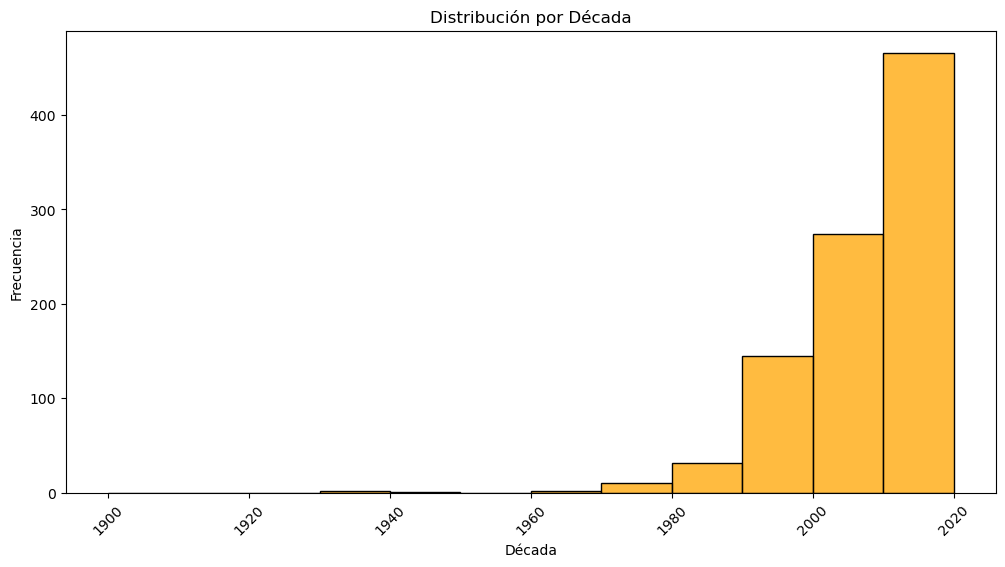

In [21]:
# Crear una lista de años por decada
decadas = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

# Graficar la distribución agrupada por década
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=decadas, kde=False, color='orange')
plt.title('Distribución por Década')
plt.xlabel('Década')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()



In [22]:
frequency_analysis = df['Genre'].value_counts()
frequency_analysis

Genre
['Action', 'Adventure', 'Sci-Fi']                                              70
['Action', 'Adventure', 'Thriller']                                            37
['Action', 'Adventure', 'Sci-Fi', 'Thriller']                                  35
['Comedy', 'Romance']                                                          28
['Comedy', 'Drama', 'Romance']                                                 27
                                                                               ..
['Drama', 'Romance', 'Sci-Fi', 'Thriller']                                      1
['Comedy', 'Crime', 'Musical']                                                  1
['Animation', 'Comedy', 'Family', 'Fantasy', 'Musical']                         1
['Action', 'Adventure', 'Mystery']                                              1
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Family', 'Sci-Fi']     1
Name: count, Length: 275, dtype: int64

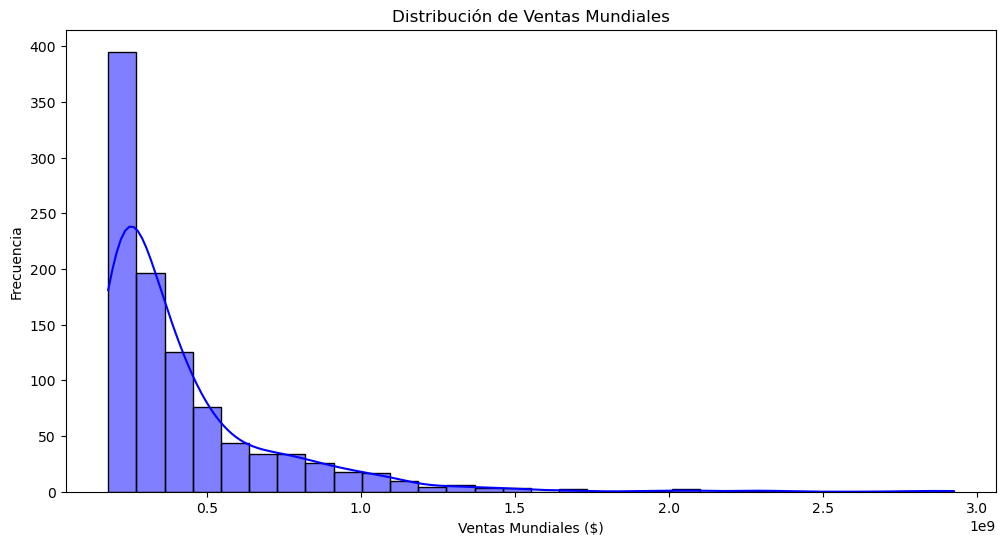

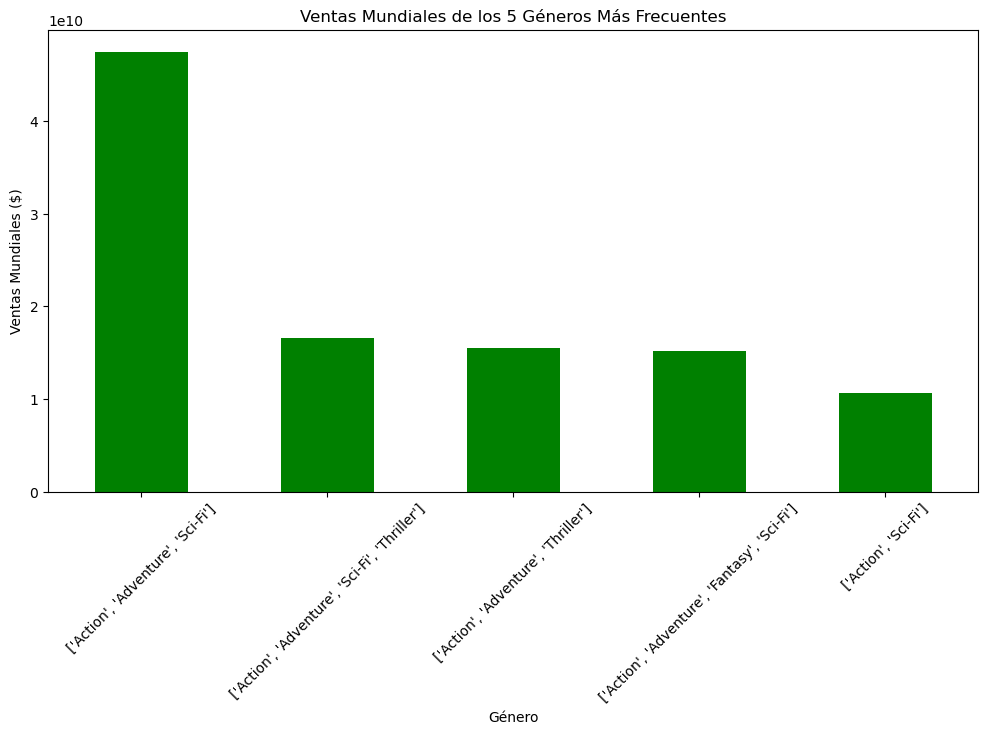

In [23]:
# 8. Gráficas
# Gráfica de distribución de las ventas mundiales
plt.figure(figsize=(12, 6))
sns.histplot(df['World Wide Sales (in $)'], kde=True, bins=30, color='blue')
plt.title('Distribución de Ventas Mundiales')
plt.xlabel('Ventas Mundiales ($)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfica de barras para los 5 géneros con más ventas mundiales
top_5_genres_sales = df.groupby('Genre')['World Wide Sales (in $)'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
top_5_genres_sales.plot(kind='bar', color='green')
plt.title('Ventas Mundiales de los 5 Géneros Más Frecuentes')
plt.xlabel('Género')
plt.ylabel('Ventas Mundiales ($)')
plt.xticks(rotation=45)
plt.show()



In [27]:

# Resultados
print("Media:\n", mean_values)
print("\nMediana:\n", median_values)
print("\nModa:\n", mode_values)
print("\nDesviación Estándar:\n", std_values)
print("\nCoeficiente de Variación (%):\n", cv_values)
print("\nCuartiles:\n", quantiles)
print("\nAnálisis de Frecuencias:\n", frequency_analysis)

Media:
 Unnamed: 0                    4.995000e+02
Year                          2.008181e+03
Budget (in $)                 9.742392e+07
Domestic Opening (in $)       4.269505e+07
Domestic Sales (in $)         1.646405e+08
International Sales (in $)    2.640890e+08
World Wide Sales (in $)       4.228430e+08
Running Time                           NaN
dtype: float64

Mediana:
 Unnamed: 0                          499.5
Year                               2010.0
Budget (in $)                  85000000.0
Domestic Opening (in $)        32790735.0
Domestic Sales (in $)         134916907.5
International Sales (in $)    194107663.0
World Wide Sales (in $)       319714782.0
Running Time                          NaN
dtype: float64

Moda:
 Unnamed: 0                                                                    0
Title                                                                   Aladdin
Movie Info                    A kind-hearted street urchin and a power-hungr...
Year                   

In [29]:
bins = list(range(df['Year'].min(), df['Year'].max() + 1, 10))
out = pd.cut(df['Year'], bins=bins)
out.value_counts()

Year
(2007, 2017]    428
(1997, 2007]    245
(1987, 1997]    118
(1977, 1987]     20
(1967, 1977]      6
(1937, 1947]      2
(1957, 1967]      2
(1947, 1957]      0
Name: count, dtype: int64